## Pré-processamento de imagem 

In [1]:
from skimage import img_as_ubyte, img_as_float
from skimage.io import imread, imshow, imsave
from skimage.transform import resize
from skimage.exposure import histogram, equalize_hist, adjust_gamma 
from skimage.filters import gaussian, laplace
from skimage.color import rgb2gray

import matplotlib.pyplot as plt
import numpy as np
import math  

### Redimensionamento e mudança para escala de cinza

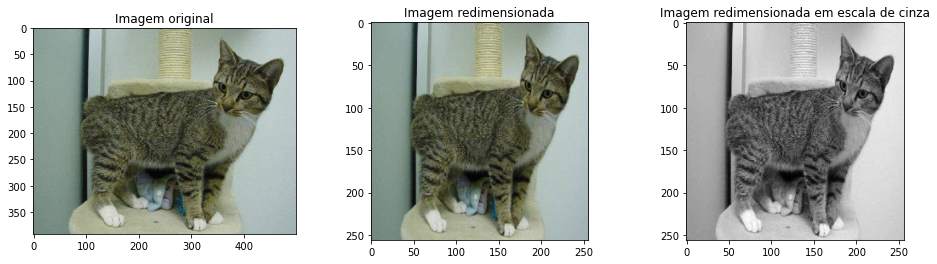

(393, 499, 3) uint8
(256, 256) float64


In [2]:
Image = imread("Pets_Dataset/train/cats/cat.2020.jpg")
New = resize(Image, (256, 256))
Gray = rgb2gray(New)

fig, (x1, x2, x3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 4), sharex=False, sharey=False)
x1.imshow(Image,  cmap = plt.cm.gray)
x1.set_title('Imagem original')
x2.imshow(New, cmap = plt.cm.gray)
x2.set_title('Imagem redimensionada')
x3.imshow(Gray, cmap = plt.cm.gray)
x3.set_title('Imagem redimensionada em escala de cinza')

#plt.savefig('resize.png', format='png')
plt.show()

print (Image.shape, Image.dtype) 
print(Gray.shape, Gray.dtype)

### Equalização de Histograma

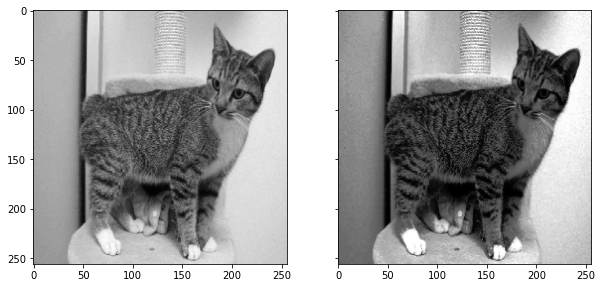

In [3]:
Equalize = equalize_hist(Gray)

fig, (x1, x2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5), sharex=True, sharey=True)
x1.imshow(Gray, cmap = plt.cm.gray)
x2.imshow(Equalize, cmap = plt.cm.gray)

plt.show()

### Correção Gamma

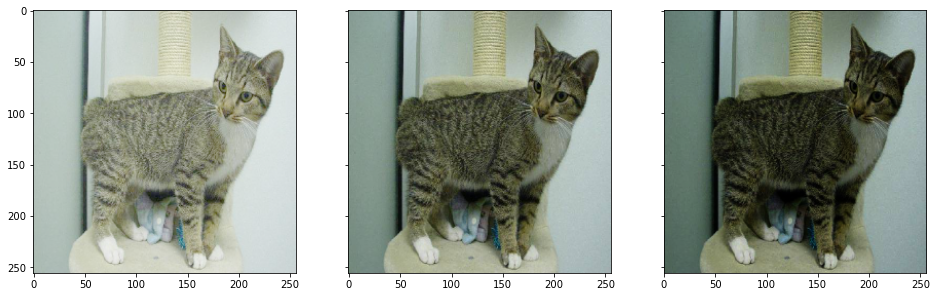

In [4]:
Gamma01 = adjust_gamma (New, gamma = 0.5, gain = 1)
Gamma02 = adjust_gamma (New, gamma = 1, gain = 1)
Gamma03 = adjust_gamma (New, gamma = 1.5, gain = 1)

fig, (x1, x2, x3) = plt.subplots(nrows=1, ncols=3, figsize=(16,8), sharex=True, sharey=True)
x1.imshow(Gamma01, cmap = plt.cm.gray)
x2.imshow(Gamma02, cmap = plt.cm.gray)
x3.imshow(Gamma03, cmap = plt.cm.gray)

plt.show()

### Suavização de Imagem

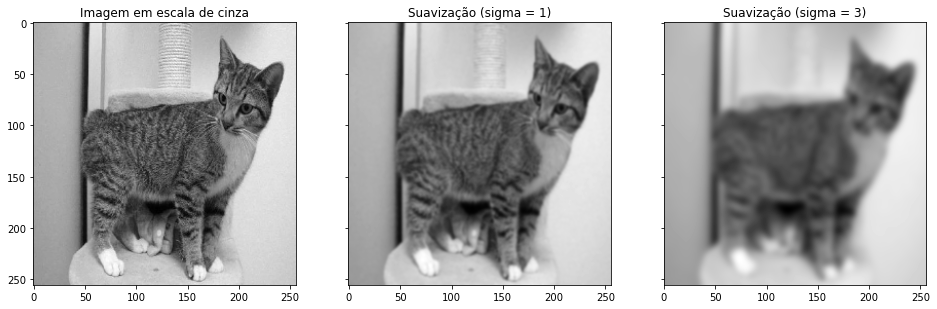

In [5]:
Gaus = gaussian (Gray, sigma = 1, multichannel=False)
Gaus2 = gaussian (Gray, sigma = 3, multichannel=False)

fig, (x1, x2, x3) = plt.subplots(nrows=1, ncols=3, figsize=(16,8), sharex=True, sharey=True)
x1.imshow(Gray, cmap = plt.cm.gray)
x1.set_title('Imagem em escala de cinza')

x2.imshow(Gaus, cmap = plt.cm.gray)
x2.set_title('Suavização (sigma = 1)')

x3.imshow(Gaus2, cmap = plt.cm.gray)
x3.set_title('Suavização (sigma = 3)')

#plt.savefig('gaus.png', format='png')
plt.show()

### Aguçamento de Imagem

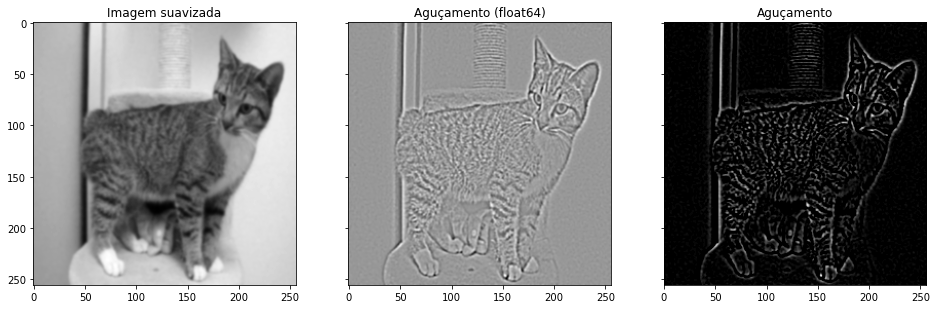

In [6]:
Gaus = gaussian (Gray, sigma = 1, multichannel=False)
Lp = laplace(Gaus)
Lp1 = img_as_ubyte(laplace(Gaus))

fig, (x1, x2, x3) = plt.subplots(nrows=1, ncols=3, figsize=(16,8), sharex=True, sharey=True)
x1.imshow(Gaus, cmap = plt.cm.gray)
x1.set_title('Imagem suavizada')

x2.imshow(Lp, cmap = plt.cm.gray)
x2.set_title('Aguçamento (float64)')

x3.imshow(Lp1, cmap = plt.cm.gray)
x3.set_title('Aguçamento')

#plt.savefig('Lp.png', format='png')
plt.show()

### Visualização dos histogramas

In [7]:
def plot_img_and_hist(image, axes, bins=256):
    
    image = img_as_ubyte(image)
    ax_img, ax_hist = axes

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='bar')
    ax_hist.ticklabel_format(axis='y', style='scientific')
    ax_hist.set_xlabel('Níveis dos pixels')
    ax_hist.set_xlim(0, 255)
    #ax_hist.set_yticks([])

    return ax_img, ax_hist

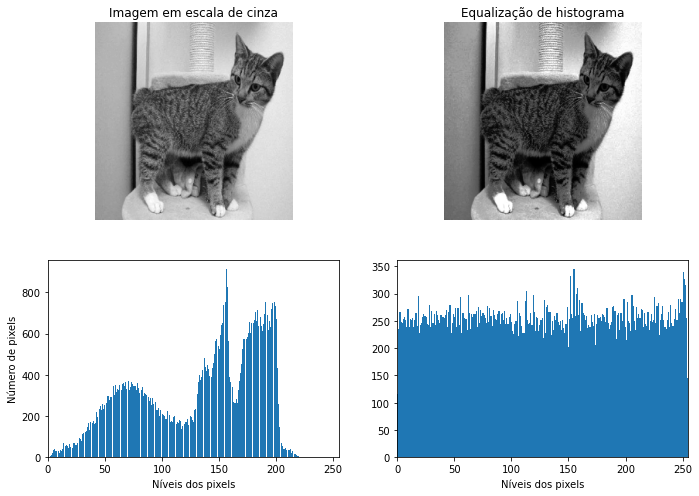

In [8]:
# Equalização de histograma

fig = plt.figure(figsize=(24, 8))
axes = np.zeros((2, 2), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 2):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 2):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist = plot_img_and_hist(Gray, axes[:, 0])
ax_img.set_title('Imagem em escala de cinza')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Número de pixels')
#ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist = plot_img_and_hist(Equalize, axes[:, 1])
ax_img.set_title('Equalização de histograma')

#plt.savefig('equalize.png', format='png')
plt.show()

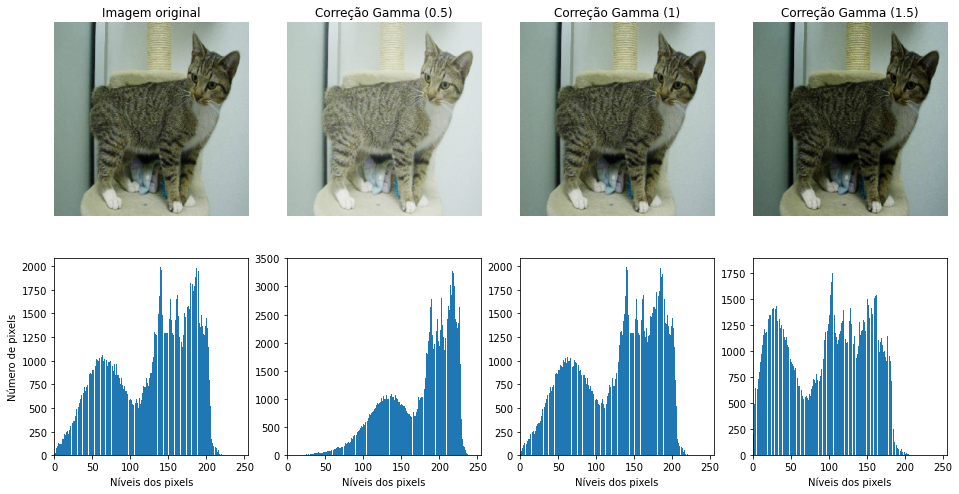

In [9]:
#Correção Gamma

fig = plt.figure(figsize=(16, 8))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist = plot_img_and_hist(New, axes[:, 0])
ax_img.set_title('Imagem original')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Número de pixels')
#ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist = plot_img_and_hist(Gamma01, axes[:, 1])
ax_img.set_title('Correção Gamma (0.5)')

ax_img, ax_hist = plot_img_and_hist(Gamma02, axes[:, 2])
ax_img.set_title('Correção Gamma (1)')

ax_img, ax_hist = plot_img_and_hist(Gamma03, axes[:, 3])
ax_img.set_title('Correção Gamma (1.5)')

#plt.savefig('gamma.png', format='png')
plt.show()

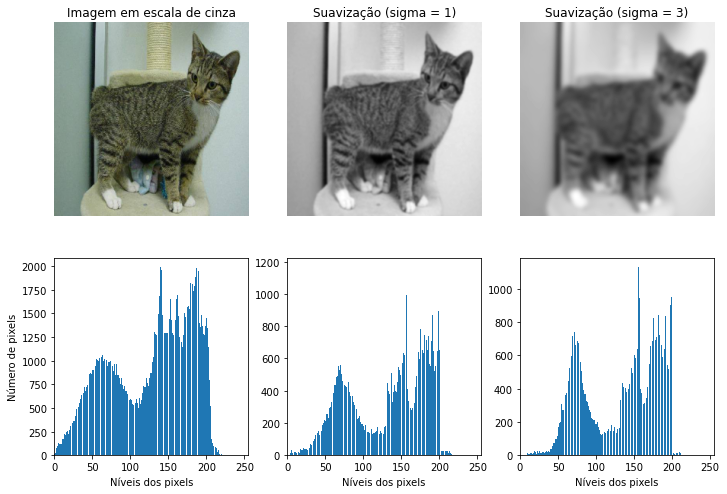

In [10]:
# Display results
fig = plt.figure(figsize=(16, 8))
axes = np.zeros((2, 3), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 3):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 3):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist = plot_img_and_hist(New, axes[:, 0])
ax_img.set_title('Imagem em escala de cinza')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Número de pixels')
#ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist = plot_img_and_hist(Gaus, axes[:, 1])
ax_img.set_title('Suavização (sigma = 1)')

ax_img, ax_hist = plot_img_and_hist(Gaus2, axes[:, 2])
ax_img.set_title('Suavização (sigma = 3)')

plt.show()

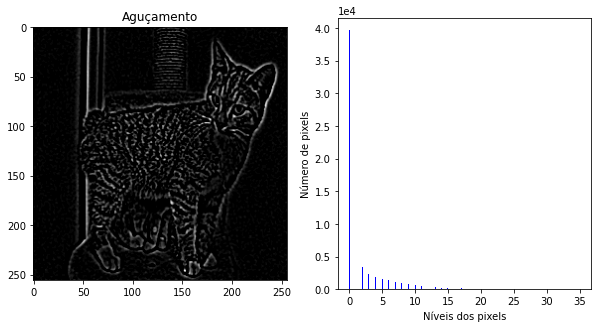

In [11]:
fig, (x1, x2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharex=False, sharey=False)
img = img_as_ubyte(Lp)
x1.imshow(img, cmap = plt.cm.gray)
x1.set_title('Aguçamento')

x2.hist(img.ravel(), bins=256, histtype='bar', color='blue')
x2.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
x2.set_xlabel('Níveis dos pixels')
x2.set_ylabel('Número de pixels')

plt.show()

# Prática 01

## Padronizando Dataset

In [12]:
from skimage import img_as_ubyte
from skimage.io import ImageCollection, imsave
from skimage.transform import resize

In [13]:
CatsTest = ImageCollection("Pets_Dataset/test/cats/*jpg")
for i, files in enumerate(CatsTest):
    New = resize(files,(128, 128))
    name = str(i)+".jpg"
    img = img_as_ubyte(New)
    imsave("NewDataset/Test/Cats/"+name, img)

In [14]:
DogsTest = ImageCollection("Pets_Dataset/test/dogs/*jpg")
for i, files in enumerate(DogsTest):
    New = resize(files,(128, 128))
    name = str(i)+".jpg"
    img = img_as_ubyte(New)
    imsave("NewDataset/Test/Dogs/"+name, img)

In [15]:
CatsTrain = ImageCollection("Pets_Dataset/train/cats/*jpg")
for i, files in enumerate(CatsTrain):
    New = resize(files,(128, 128))
    name = str(i)+".jpg"
    img = img_as_ubyte(New)
    imsave("NewDataset/Train/Cats/"+name, img)

In [16]:
DogsTrain = ImageCollection("Pets_Dataset/train/dogs/*jpg")
for i, files in enumerate(DogsTrain):
    New = resize(files,(128, 128))
    name = str(i)+".jpg"
    img = img_as_ubyte(New)
    imsave("NewDataset/Train/Dogs/"+name, img)

In [17]:
CatsTest = ImageCollection("NewDataset/Test/Cats/*jpg")
DogsTest = ImageCollection("NewDataset/Test/Dogs/*jpg")
CatsTrain = ImageCollection("NewDataset/Train/Cats/*jpg")
DogsTrain = ImageCollection("NewDataset/Train/Dogs/*jpg")

## Roteiro I

#### Equalização de Histograma

In [19]:
for i, image in enumerate(CatsTest):
    Gray = rgb2gray(image)
    Hist = equalize_hist(Gray)
    name = str(i)+".jpg"
    img = img_as_ubyte(Hist)
    imsave("NewDataset/Histogram/Test/Cats/"+name, img)
    
for i, image in enumerate(DogsTest):
    Gray = rgb2gray(image)
    Hist = equalize_hist(Gray)
    name = str(i)+".jpg"
    img = img_as_ubyte(Hist)
    imsave("NewDataset/Histogram/Test/Dogs/"+name, img)

for i, image in enumerate(CatsTrain):
    Gray = rgb2gray(image)
    Hist = equalize_hist(Gray)
    name = str(i)+".jpg"
    img = img_as_ubyte(Hist)
    imsave("NewDataset/Histogram/Train/Cats/"+name, img)
    
for i, image in enumerate(DogsTrain):
    Gray = rgb2gray(image)
    Hist = equalize_hist(Gray)
    name = str(i)+".jpg"
    img = img_as_ubyte(Hist)
    imsave("NewDataset/Histogram/Train/Dogs/"+name, img)

#### Correção Gamma_01

In [20]:
for i, image in enumerate(CatsTest):
    name = str(i)+".jpg"
    Gray = rgb2gray(image)
    Gamma01 = adjust_gamma(Gray, gamma = 1, gain = 1)
    img = img_as_ubyte(Gamma01)
    imsave("NewDataset/Gamma/Test/Cats/Gamma01/"+name, img)
    
for i, image in enumerate(DogsTest):
    name = str(i)+".jpg"
    Gray = rgb2gray(image)
    Gamma01 = adjust_gamma(Gray, gamma = 1, gain = 1)
    img = img_as_ubyte(Gamma01)
    imsave("NewDataset/Gamma/Test/Dogs/Gamma01/"+name, img)

for i, image in enumerate(CatsTrain):
    name = str(i)+".jpg"
    Gray = rgb2gray(image)
    Gamma01 = adjust_gamma(Gray, gamma = 1, gain = 1)
    img = img_as_ubyte(Gamma01)
    imsave("NewDataset/Gamma/Train/Cats/Gamma01/"+name, img)

for i, image in enumerate(DogsTrain):
    name = str(i)+".jpg"
    Gray = rgb2gray(image)
    Gamma01 = adjust_gamma(Gray, gamma = 1, gain = 1)
    img = img_as_ubyte(Gamma01)
    imsave("NewDataset/Gamma/Train/Dogs/Gamma01/"+name, img)

#### Correção Gamma_02

In [21]:
for i, image in enumerate(CatsTest):
    name = str(i)+".jpg"
    Gray = rgb2gray(image)
    Gamma02 = adjust_gamma(Gray, gamma = 0.5, gain = 1)
    img = img_as_ubyte(Gamma02)
    imsave("NewDataset/Gamma/Test/Cats/Gamma02/"+name, img)
    
for i, image in enumerate(DogsTest):
    name = str(i)+".jpg"
    Gray = rgb2gray(image)
    Gamma02 = adjust_gamma(Gray, gamma = 0.5, gain = 1)
    img = img_as_ubyte(Gamma02)
    imsave("NewDataset/Gamma/Test/Dogs/Gamma02/"+name, img)
    
for i, image in enumerate(CatsTrain):
    name = str(i)+".jpg"
    Gray = rgb2gray(image)
    Gamma02 = adjust_gamma(Gray, gamma = 0.5, gain = 1)
    img = img_as_ubyte(Gamma02)
    imsave("NewDataset/Gamma/Train/Cats/Gamma02/"+name, img)
    
for i, image in enumerate(DogsTrain):
    name = str(i)+".jpg"
    Gray = rgb2gray(image)
    Gamma02 = adjust_gamma(Gray, gamma = 0.5, gain = 1)
    img = img_as_ubyte(Gamma02)
    imsave("NewDataset/Gamma/Train/Dogs/Gamma02/"+name, img)


#### Correção Gamma_03

In [22]:
for i, image in enumerate(CatsTest):
    name = str(i)+".jpg"
    Gray = rgb2gray(image)
    Gamma03 = adjust_gamma(Gray, gamma = 1.5, gain = 1)
    img = img_as_ubyte(Gamma03)
    imsave("NewDataset/Gamma/Test/Cats/Gamma03/"+name, img)
for i, image in enumerate(DogsTest):
    name = str(i)+".jpg"
    Gray = rgb2gray(image)
    Gamma03 = adjust_gamma(Gray, gamma = 1.5, gain = 1)
    img = img_as_ubyte(Gamma03)
    imsave("NewDataset/Gamma/Test/Dogs/Gamma03/"+name, img)
for i, image in enumerate(CatsTrain):
    name = str(i)+".jpg"
    Gray = rgb2gray(image)
    Gamma03 = adjust_gamma(Gray, gamma = 1.5, gain = 1)
    img = img_as_ubyte(Gamma03)
    imsave("NewDataset/Gamma/Train/Cats/Gamma03/"+name, img)
for i, image in enumerate(DogsTrain):
    name = str(i)+".jpg"
    Gray = rgb2gray(image)
    Gamma03 = adjust_gamma(Gray, gamma = 1.5, gain = 1)
    img = img_as_ubyte(Gamma03)
    imsave("NewDataset/Gamma/Train/Dogs/Gamma03/"+name, img)

#### Suavização de Imagem

In [23]:
for i, image in enumerate(CatsTest):
    Gray = rgb2gray(image)
    Gaus = gaussian(Gray, sigma = 1)
    name = str(i)+".jpg"
    img = img_as_ubyte(Gaus)
    imsave("NewDataset/Gaussiano/Test/Cats/"+name, img)
    
for i, image in enumerate(DogsTest):
    Gray = rgb2gray(image)
    Gaus = gaussian(Gray, sigma = 1)
    name = str(i)+".jpg"
    img = img_as_ubyte(Gaus)
    imsave("NewDataset/Gaussiano/Test/Dogs/"+name, img)

for i, image in enumerate(CatsTrain):
    Gray = rgb2gray(image)
    Gaus = gaussian(Gray, sigma = 1)
    name = str(i)+".jpg"
    img = img_as_ubyte(Gaus)
    imsave("NewDataset/Gaussiano/Train/Cats/"+name, img)
    
for i, image in enumerate(DogsTrain):
    Gray = rgb2gray(image)
    Gaus = gaussian(Gray, sigma = 1)
    name = str(i)+".jpg"
    img = img_as_ubyte(Gaus)
    imsave("NewDataset/Gaussiano/Train/Dogs/"+name, img)

#### Aguçamento de Imagem

In [25]:

for i, image in enumerate(CatsTest):
    Gray = rgb2gray(image)
    Gaus = gaussian(Gray, sigma = 1)
    Lp = laplace(Gaus)
    name = str(i)+".jpg"
    img = img_as_ubyte(Lp)
    imsave("NewDataset/Laplace/Test/Cats/"+name, img)
    
for i, image in enumerate(CatsTest):
    Gray = rgb2gray(image)
    Gaus = gaussian(Gray, sigma = 1)
    Lp = laplace(Gaus)
    name = str(i)+".jpg"
    img = img_as_ubyte(Lp)
    imsave("NewDataset/Laplace/Test/Dogs/"+name, img)
    
for i, image in enumerate(CatsTrain):
    Gray = rgb2gray(image)
    Gaus = gaussian(Gray, sigma = 1)
    Lp = laplace(Gaus)
    name = str(i)+".jpg"
    img = img_as_ubyte(Lp)
    imsave("NewDataset/Laplace/Train/Cats/"+name, img)
    
for i, image in enumerate(DogsTrain):
    Gray = rgb2gray(image)
    Gaus = gaussian(Gray, sigma = 1)
    Lp = laplace(Gaus)
    name = str(i)+".jpg"
    img = img_as_ubyte(Lp)
    imsave("NewDataset/Laplace/Train/Dogs/"+name, img)

/home/lais/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: NewDataset/Laplace/Test/Cats/178.jpg is a low contrast image
  if __name__ == '__main__':
/home/lais/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: NewDataset/Laplace/Test/Cats/185.jpg is a low contrast image
  if __name__ == '__main__':
/home/lais/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: NewDataset/Laplace/Test/Cats/244.jpg is a low contrast image
  if __name__ == '__main__':
/home/lais/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: NewDataset/Laplace/Test/Cats/257.jpg is a low contrast image
  if __name__ == '__main__':
/home/lais/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: NewDataset/Laplace/Test/Cats/317.jpg is a low contrast image
  if __name__ == '__main__':
/home/lais/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: NewDataset/Laplace/Test/Cats

## Roteiro II

## Transformações de cor

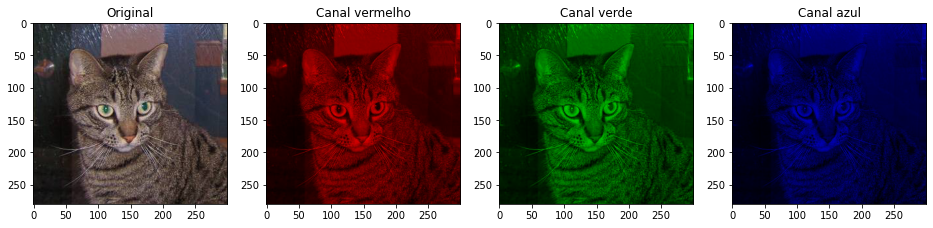

In [26]:
Original = imread("Pets_Dataset/train/cats/cat.1.jpg")
Original = img_as_float(Original)

RedMultiplier = [1, 0, 0]
GreenMultiplier = [0, 1, 0]
BlueMultiplier = [0, 0, 1]

# Canais de cor RGB
Red_channel = Original*RedMultiplier
Green_channel = Original*GreenMultiplier
Blue_channel = Original*BlueMultiplier

fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(16, 8))

ax0.imshow(Original)
ax0.set_title('Original')
ax1.imshow(Red_channel, cmap = plt.cm.gray)
ax1.set_title('Canal vermelho')
ax2.imshow(Green_channel, cmap = plt.cm.gray)
ax2.set_title('Canal verde')
ax3.imshow(Blue_channel, cmap = plt.cm.gray)
ax3.set_title('Canal azul')

#plt.savefig('rgb.png', format='png')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


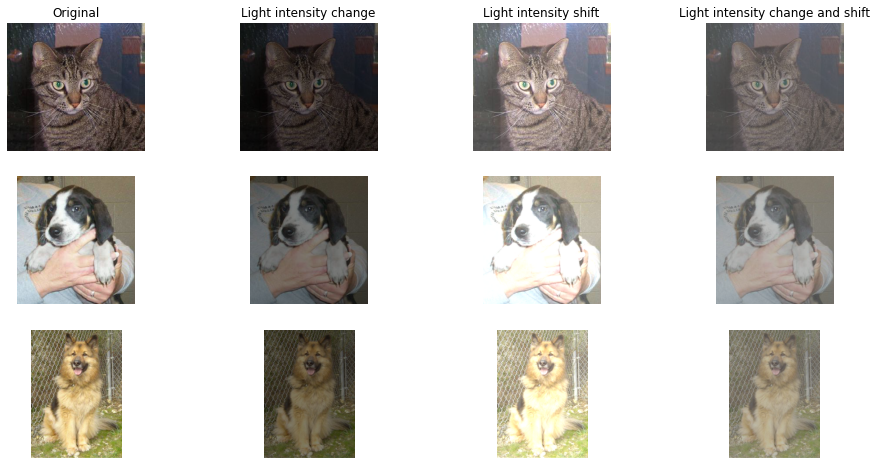

In [27]:
img1 = img_as_float(imread("Pets_Dataset/train/cats/cat.1.jpg"))
img2 = img_as_float(imread("Pets_Dataset/train/dogs/dog.10.jpg"))
img3 = img_as_float(imread("Pets_Dataset/train/dogs/dog.2020.jpg"))

# Light intensity change
RMultiplier = [0.5, 0, 0]
GMultiplier = [0, 0.5, 0]
BMultiplier = [0, 0, 0.5]

TC1 = (RMultiplier * img1)+(GMultiplier * img1)+(BMultiplier * img1)
TC1_2 = (RMultiplier * img2)+(GMultiplier * img2)+(BMultiplier * img2)
TC1_3 = (RMultiplier * img3)+(GMultiplier * img3)+(BMultiplier * img3)

# Light intensity shift
Shift = [0.25, 0.25, 0.25]

TC2 = img1 + Shift
TC2_2 = img2 + Shift
TC2_3 = img3 + Shift

#Light intensity change and shift
TC3 = TC1 + Shift
TC3_2 = TC1_2 + Shift
TC3_3 = TC1_3 + Shift

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 8))

axes[0, 0].imshow(img1, cmap = plt.cm.gray)
axes[0, 0].set_axis_off()
axes[0, 1].imshow(TC1, cmap = plt.cm.gray)
axes[0, 1].set_axis_off()
axes[0, 2].imshow(TC2, cmap = plt.cm.gray)
axes[0, 2].set_axis_off()
axes[0, 3].imshow(TC3, cmap = plt.cm.gray)
axes[0, 3].set_axis_off()

axes[1, 0].imshow(img2, cmap = plt.cm.gray)
axes[1, 0].set_axis_off()
axes[1, 1].imshow(TC1_2, cmap = plt.cm.gray)
axes[1, 1].set_axis_off()
axes[1, 2].imshow(TC2_2, cmap = plt.cm.gray)
axes[1, 2].set_axis_off()
axes[1, 3].imshow(TC3_2, cmap = plt.cm.gray)
axes[1, 3].set_axis_off()

axes[2, 0].imshow(img3, cmap = plt.cm.gray)
axes[2, 0].set_axis_off()
axes[2, 1].imshow(TC1_3, cmap = plt.cm.gray)
axes[2, 1].set_axis_off()
axes[2, 2].imshow(TC2_3, cmap = plt.cm.gray)
axes[2, 2].set_axis_off()
axes[2, 3].imshow(TC3_3, cmap = plt.cm.gray)
axes[2, 3].set_axis_off()

axes[0, 0].set_title('Original')
axes[0, 1].set_title('Light intensity change')
axes[0, 2].set_title('Light intensity shift')
axes[0, 3].set_title('Light intensity change and shift')

#plt.savefig('transf.png', format='png')
plt.show()

In [28]:
print(Original.shape, Original.dtype, Original.max(), Original.min()) 
print(TC1.shape, TC1.dtype, TC1.max(), TC1.min()) 
print(TC2.shape, TC2.dtype, TC2.max(), TC2.min()) 
print(TC3.shape, TC3.dtype, TC3.max(), TC3.min()) 

(280, 300, 3) float64 1.0 0.0
(280, 300, 3) float64 0.5 0.0
(280, 300, 3) float64 1.25 0.25
(280, 300, 3) float64 0.75 0.25


## Extração de features

#### Histograma RGB

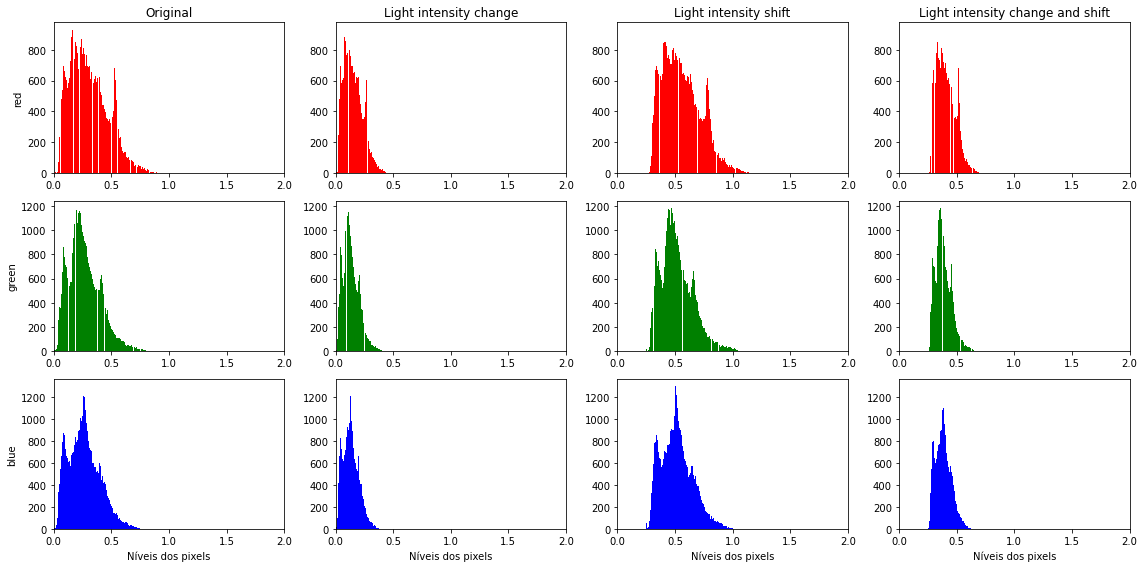

In [29]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 8))

for i, img in enumerate((Original, TC1, TC2, TC3)):
    for c, c_color in enumerate(('red', 'green', 'blue')):
        axes[c, i].hist(img[..., c].ravel(), bins=256, histtype='bar', color=c_color)
        axes[c, 0].set_ylabel(c_color)
        axes[c, i].set_xlim(0, 2)

axes[0, 0].set_title('Original')
axes[0, 1].set_title('Light intensity change')
axes[0, 2].set_title('Light intensity shift')
axes[0, 3].set_title('Light intensity change and shift')

axes[2, 0].set_xlabel('Níveis dos pixels')
axes[2, 1].set_xlabel('Níveis dos pixels')
axes[2, 2].set_xlabel('Níveis dos pixels')
axes[2, 3].set_xlabel('Níveis dos pixels')

#plt.savefig('rgb_hist.png', format='png')
plt.tight_layout()
plt.show()

#### O1, O2

In [32]:
O1 = (Red_channel-Green_channel)/math.sqrt(2)
O2 = (Red_channel+Green_channel-(2*Blue_channel))/math.sqrt(6)

O1_O2 = O1 + O2

# Light intensity change (0.5) e O1, O2
R = 0.5*Red_channel
G = 0.5*Green_channel
B = 0.5*Blue_channel

TC1_O1 = (R-G)/math.sqrt(2)
          
TC1_O2 = ((R+G)-(2*B))/math.sqrt(6)

TC1_O1_O2 = TC1_O1 + TC1_O2

In [33]:
# Light intensity shift (0.15) e O1, 02
R = Red_channel + 0.15
G = Green_channel + 0.15
B = Blue_channel + 0.15

TC2_O1 = (R-G)/math.sqrt(2)
          
TC2_O2 = ((R+G)-(2*B))/math.sqrt(6)

TC2_O1_O2 = TC2_O1 + TC2_O2

In [34]:
#Light intensity change and shift e O1, O2

R = (0.5*Red_channel) + 0.15
G = (0.5*Green_channel) + 0.15
B = (0.5*Blue_channel) + 0.15

TC3_O1 = (R-G)/math.sqrt(2)
          
TC3_O2 = ((R+G)-(2*B))/math.sqrt(6)

TC3_O1_O2 = TC3_O1 + TC3_O2

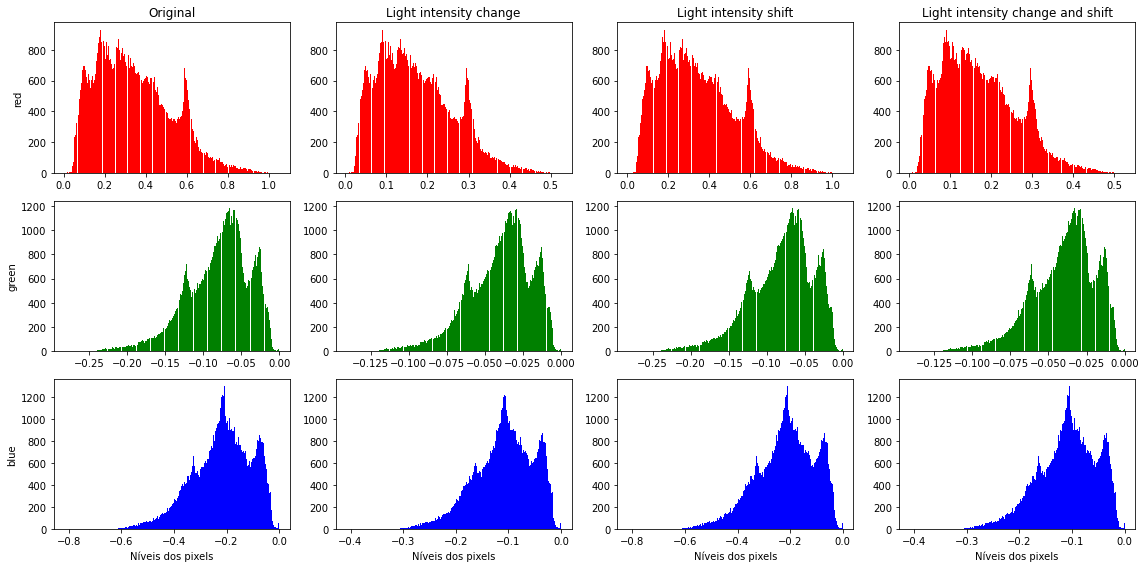

In [35]:
# Histograma RGB - O1, O2

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 8))

for i, img in enumerate((O1_O2, TC1_O1_O2, TC2_O1_O2, TC3_O1_O2)):
    for c, c_color in enumerate(('red', 'green', 'blue')):
        axes[c, i].hist(img[..., c].ravel(), bins=256, histtype='bar', color=c_color)
        axes[c, 0].set_ylabel(c_color)
        #axes[c, i].set_xlim(0, 355)

axes[0, 0].set_title('Original')
axes[0, 1].set_title('Light intensity change')
axes[0, 2].set_title('Light intensity shift')
axes[0, 3].set_title('Light intensity change and shift')

axes[2, 0].set_xlabel('Níveis dos pixels')
axes[2, 1].set_xlabel('Níveis dos pixels')
axes[2, 2].set_xlabel('Níveis dos pixels')
axes[2, 3].set_xlabel('Níveis dos pixels')

#plt.savefig('o1o2.png', format='png')
plt.tight_layout()
plt.show()

#### Transformada de cor

In [36]:
Media = np.mean(Original, axis=0)
Desvio = np.std(Original, axis=0) 

TC = (Original - Media)/Desvio

# Light intensity change (1.5) e Transformada de cor

Media1 = np.mean(TC1, axis=0)
Desvio1 = np.std(TC1, axis=0) 

TC_TC1 = (TC1 - Media1)/Desvio1

# Light intensity shift e Transformada de cor

Media2 = np.mean(TC2, axis=0)
Desvio2 = np.std(TC2, axis=0) 

TC_TC2 = (TC2 - Media2)/Desvio2

#Light intensity change anda shift e Transformada de cor

Media3 = np.mean(TC3, axis=0)
Desvio3 = np.std(TC3, axis=0) 

TC_TC3 = (TC3 - Media3)/Desvio3

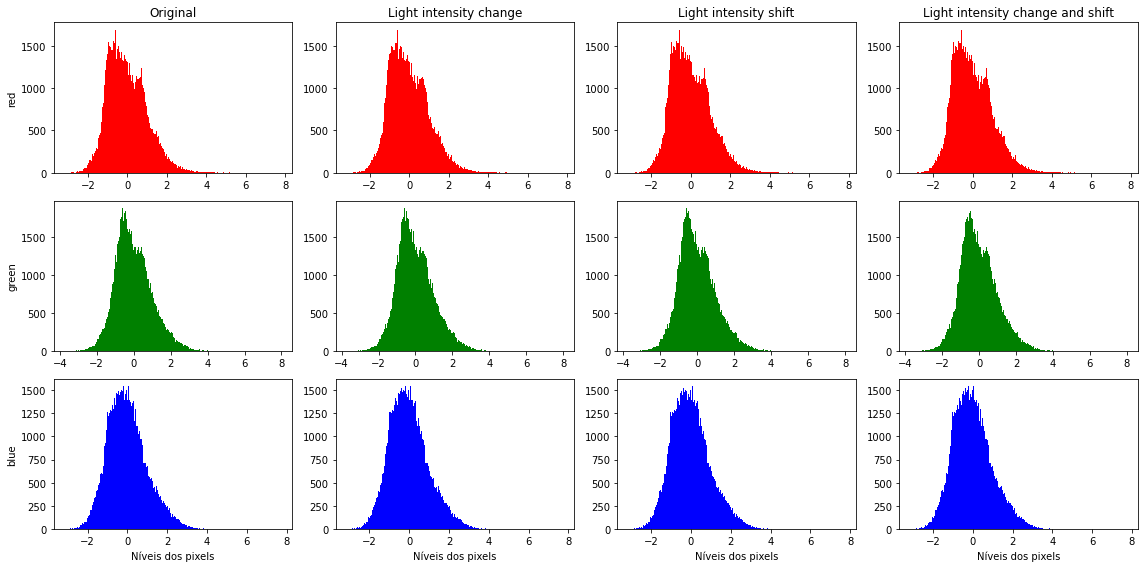

In [37]:
# Histograma RGB - Transformada de cor

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 8))

for i, img in enumerate((TC, TC_TC1, TC_TC2, TC_TC3)):
    for c, c_color in enumerate(('red', 'green', 'blue')):
        axes[c, i].hist(img[..., c].ravel(), bins=256, histtype='bar', color=c_color)
        axes[c, 0].set_ylabel(c_color)
        #axes[c, i].set_xlim(0, 355)

axes[0, 0].set_title('Original')
axes[0, 1].set_title('Light intensity change')
axes[0, 2].set_title('Light intensity shift')
axes[0, 3].set_title('Light intensity change and shift')

axes[2, 0].set_xlabel('Níveis dos pixels')
axes[2, 1].set_xlabel('Níveis dos pixels')
axes[2, 2].set_xlabel('Níveis dos pixels')
axes[2, 3].set_xlabel('Níveis dos pixels')

#plt.savefig('tc.png', format='png')
plt.tight_layout()
plt.show()

#### Extração de canais RGB

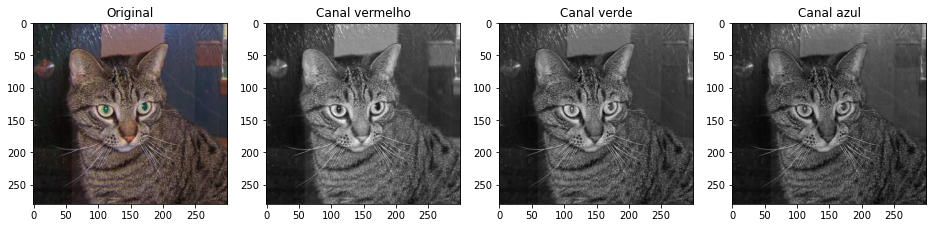

In [102]:
Original = imread("Pets_Dataset/train/cats/cat.1.jpg")
Original = img_as_float(Original)
img = Original
# Canais de cor RGB
red_channel = img[:, :, 0]
green_channel = img[:, :, 1]
blue_channel = img[:, :, 2]

fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(16, 8))

ax0.imshow(Original, cmap = plt.cm.gray)
ax0.set_title('Original')
ax1.imshow(red_channel, cmap = plt.cm.gray)
ax1.set_title('Canal vermelho')
ax2.imshow(green_channel, cmap = plt.cm.gray)
ax2.set_title('Canal verde')
ax3.imshow(blue_channel, cmap = plt.cm.gray)
ax3.set_title('Canal azul')

#plt.savefig('rgbgray.png', format='png')
plt.show()

In [33]:
print(img.shape, img.dtype, img.max(), img.min()) 
print(red_channel.shape, red_channel.dtype, red_channel.max(), red_channel.min())
print(green_channel.shape, green_channel.dtype, green_channel.max(), green_channel.min())
print(blue_channel.shape, blue_channel.dtype, blue_channel.max(), blue_channel.min())

(280, 300, 3) float64 1.0 0.0
(280, 300) float64 0.9411764705882353 0.00392156862745098
(280, 300) float64 0.9450980392156862 0.0
(280, 300) float64 1.0 0.0


# Prática 02

In [1]:
from skimage.io import imread, imshow, imsave, ImageCollection
from skimage.feature import local_binary_pattern
from skimage import img_as_ubyte
from os.path import basename
from pandas import Series, DataFrame
#from numpy import array, matrix, reshape
#from matplotlib.pyplot import subplots, tight_layout
import matplotlib.pyplot as plt
import numpy as np
import h5py


In [2]:
CatsTestHist = ImageCollection("NewDataset/Histogram/Test/Cats/*jpg")
DogsTestHist = ImageCollection("NewDataset/Histogram/Test/Dogs/*jpg")

CatsTestGamma01 = ImageCollection("NewDataset/Gamma/Test/Cats/Gamma01/*jpg")
DogsTestGamma01 = ImageCollection("NewDataset/Gamma/Test/Dogs/Gamma01/*jpg")

CatsTestGamma02 = ImageCollection("NewDataset/Gamma/Test/Cats/Gamma02/*jpg")
DogsTestGamma02 = ImageCollection("NewDataset/Gamma/Test/Dogs/Gamma02/*jpg")

CatsTestGamma03 = ImageCollection("NewDataset/Gamma/Test/Cats/Gamma03/*jpg")
DogsTestGamma03 = ImageCollection("NewDataset/Gamma/Test/Dogs/Gamma03/*jpg")

CatsTestGauss = ImageCollection("NewDataset/Gaussiano/Test/Cats/*jpg")
DogsTestGauss = ImageCollection("NewDataset/Gaussiano/Test/Dogs/*jpg")

CatsTestLP = ImageCollection("NewDataset/Laplace/Test/Cats/*jpg")
DogsTestLP = ImageCollection("NewDataset/Laplace/Test/Dogs/*jpg")

In [3]:
CatsTrainHist = ImageCollection("NewDataset/Histogram/Train/Cats/*jpg")
DogsTrainHist = ImageCollection("NewDataset/Histogram/Train/Dogs/*jpg")

CatsTrainGamma01 = ImageCollection("NewDataset/Gamma/Train/Cats/Gamma01/*jpg")
DogsTrainGamma01 = ImageCollection("NewDataset/Gamma/Train/Dogs/Gamma01/*jpg")

CatsTrainGamma02 = ImageCollection("NewDataset/Gamma/Train/Cats/Gamma02/*jpg")
DogsTrainGamma02 = ImageCollection("NewDataset/Gamma/Train/Dogs/Gamma02/*jpg")

CatsTrainGamma03 = ImageCollection("NewDataset/Gamma/Train/Cats/Gamma03/*jpg")
DogsTrainGamma03 = ImageCollection("NewDataset/Gamma/Train/Dogs/Gamma03/*jpg")

CatsTrainGaus = ImageCollection("NewDataset/Gaussiano/Train/Cats/*jpg")
DogsTrainGaus = ImageCollection("NewDataset/Gaussiano/Train/Dogs/*jpg")

CatsTrainLP = ImageCollection("NewDataset/Laplace/Train/Cats/*jpg")
DogsTrainLP = ImageCollection("NewDataset/Laplace/Train/Dogs/*jpg")

In [4]:
Original = imread("NewDataset/Laplace/Test/Cats/4999.jpg")
#imshow(Original)
print (Original.dtype, Original.shape, Original.itemsize)

uint8 (128, 128) 1


In [5]:
def matriz(nRows):
    matriz = []
    for i in range(nRows):
        row = []
        matriz.append(row)
    return matriz

### Roteiro I

In [ ]:
#LBP test

Hist = []

for i, files in enumerate(CatsTestHist):
    LBPtest = local_binary_pattern(files, 8, 1.0).reshape(1, -1)
    for number in LBPtest:
        Hist.insert(i, number)
for i, files in enumerate(DogsTestHist):
    LBPtest = local_binary_pattern(files, 8, 1.0).reshape(1, -1)
    for number in LBPtest:
        Hist.insert(i, number)

Gamma01 = []

for i, files in enumerate(CatsTestGamma01):
    LBPtest = local_binary_pattern(files, 8, 1.0).reshape(1, -1)
    for number in LBPtest:
        Gamma01.insert(i, number)
for i, files in enumerate(DogsTestGamma01):
    LBPtest = local_binary_pattern(files, 8, 1.0).reshape(1, -1)
    for number in LBPtest:
        Gamma01.insert(i, number)

Gamma02 = []

for i, files in enumerate(CatsTestGamma02):
    LBPtest = local_binary_pattern(files, 8, 1.0).reshape(1, -1)
    for number in LBPtest:
        Gamma02.insert(i, number)
for i, files in enumerate(DogsTestGamma02):
    LBPtest = local_binary_pattern(files, 8, 1.0).reshape(1, -1)
    for number in LBPtest:
        Gamma02.insert(i, number)
        
Gamma03 = []

for i, files in enumerate(CatsTestGamma03):
    LBPtest = local_binary_pattern(files, 8, 1.0).reshape(1, -1)
    for number in LBPtest:
        Gamma03.insert(i, number)
for i, files in enumerate(DogsTestGamma03):
    LBPtest = local_binary_pattern(files, 8, 1.0).reshape(1, -1)
    for number in LBPtest:
        Gamma03.insert(i, number)

Gauss = []

for i, files in enumerate(CatsTestGauss):
    LBPtest = local_binary_pattern(files, 8, 1.0).reshape(1, -1)
    for number in LBPtest:
        Gauss.insert(i, number)
for i, files in enumerate(DogsTestGauss):
    LBPtest = local_binary_pattern(files, 8, 1.0).reshape(1, -1)
    for number in LBPtest:
        Gauss.insert(i, number)
        
Laplace = []

for i, files in enumerate(CatsTestLP):
    LBPtest = local_binary_pattern(files, 8, 1.0).reshape(1, -1)
    for number in LBPtest:
        Laplace.insert(i, number)
for i, files in enumerate(DogsTestLP):
    LBPtest = local_binary_pattern(files, 8, 1.0).reshape(1, -1)
    for number in LBPtest:
        Laplace.insert(i, number)

In [ ]:
Hist

In [ ]:
LBP = matriz(10000)
Label = []

for i, rows in enumerate(LBP):
    LBP[i] = np.concatenate((Hist[i], Gamma01[i], Gamma02[i], Gamma03[i], Gauss[i], Laplace[i]), axis=None)

    if i< 5000:
        Label.insert(i, 0)
    else:
        Label.insert(i, 1)

    LBP[i] = LBP[i].astype("uint8")

In [ ]:
LBPTest = DataFrame(LBP)
LabelLBP = DataFrame(Label)

In [ ]:
LBPTest
LabelLBP

In [ ]:
with h5py.File("LBPTest.h5", 'w') as hdf:
    hdf.create_dataset('datasetTest', data = LBPTest)

In [ ]:
with h5py.File("LabelLBP.h5", 'w') as hdf:
    hdf.create_dataset('datasetlabeltest', data = LabelLBP)

In [ ]:
import h5py

X = "MLP/LBPTest.h5"

with h5py.File(X, "r") as hdf:
    print("Keys: %s" % hdf.keys())
    x = list(hdf.keys())[0]
    
    data = list(hdf[x])
    print(data)

In [ ]:
LBPTest.h5

In [ ]:
LBPTest

In [ ]:
#LBP train

Hist = []

for i, files in enumerate(CatsTrainHist):
    LBPtrain = local_binary_pattern(files, 8, 1.0).reshape(1, -1).astype("uint8")
    for number in LBPtrain:
        Hist.insert(i, number)       
for i, files in enumerate(DogsTrainHist):
    LBPtrain = local_binary_pattern(files, 8, 1.0).reshape(1, -1).astype("uint8")
    for number in LBPtrain:
        Hist.insert(i, number)

Gamma01 = []

for i, files in enumerate(CatsTrainGamma01):
    LBPtrain = local_binary_pattern(files, 8, 1.0).reshape(1, -1).astype("uint8")
    for number in LBPtrain:
        Gamma01.insert(i, number)
for i, files in enumerate(DogsTrainGamma01):
    LBPtrain = local_binary_pattern(files, 8, 1.0).reshape(1, -1).astype("uint8")
    for number in LBPtrain:
        Gamma01.insert(i, number)

Gamma02 = []

for i, files in enumerate(CatsTrainGamma02):
    LBPtrain = local_binary_pattern(files, 8, 1.0).reshape(1, -1).astype("uint8")
    for number in LBPtrain:
        Gamma02.insert(i, number)
for i, files in enumerate(DogsTrainGamma02):
    LBPtrain = local_binary_pattern(files, 8, 1.0).reshape(1, -1).astype("uint8")
    for number in LBPtrain:
        Gamma02.insert(i, number)
        
Gamma03 = []

for i, files in enumerate(CatsTrainGamma03):
    LBPtrain = local_binary_pattern(files, 8, 1.0).reshape(1, -1).astype("uint8")
    for number in LBPtrain:
        Gamma03.insert(i, number)
for i, files in enumerate(DogsTrainGamma03):
    LBPtrain = local_binary_pattern(files, 8, 1.0).reshape(1, -1).astype("uint8")
    for number in LBPtrain:
        Gamma03.insert(i, number)

Gauss = []

for i, files in enumerate(CatsTrainGaus):
    LBPtrain = local_binary_pattern(files, 8, 1.0).reshape(1, -1).astype("uint8")
    for number in LBPtrain:
        Gauss.insert(i, number)
for i, files in enumerate(DogsTrainGaus):
    LBPtrain = local_binary_pattern(files, 8, 1.0).reshape(1, -1).astype("uint8")
    for number in LBPtrain:
        Gauss.insert(i, number)
        
Laplace = []

for i, files in enumerate(CatsTrainLP):
    LBPtrain = local_binary_pattern(files, 8, 1.0).reshape(1, -1).astype("uint8")
    for number in LBPtrain:
        Laplace.insert(i, number)
for i, files in enumerate(DogsTrainLP):
    LBPtrain = local_binary_pattern(files, 8, 1.0).reshape(1, -1).astype("uint8")
    for number in LBPtrain:
        Laplace.insert(i, number)

In [ ]:
LBPTrain = matriz(10000)
LabelTrainLBP = []

for i, rows in enumerate(LBPTrain):
    LBPTrain[i] = np.concatenate((Hist[i], Gamma01[i], Gamma02[i], Gamma03[i], Gauss[i], Laplace[i]), axis=None)

    if i< 5000:
        LabelTrainLBP.insert(i, 0)
    else:
        LabelTrainLBP.insert(i, 1)

    LBPTrain[i] = np.concatenate((LBPTrain[i], LabelTrainLBP[i]), axis = None)

In [ ]:
with h5py.File("LBPtrain.h5", 'w') as hdf:
    hdf.create_dataset('datasettrain', data = LBPTrain)

In [ ]:
with h5py.File("LabelTrainLBP.h5", 'w') as hdf:
    hdf.create_dataset('datasetlabeltrain', data = LabelTrainLBP)

### MLP

In [ ]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(128, 64, 32), random_state=1, early_stopping=True, batch_size=128)

In [ ]:
clf.fit(X, y)                         

In [ ]:
clf.predict(X1)

In [ ]:
clf.score(X1, y1)

In [ ]:
#GLCM train

from skimage.feature import greycomatrix, greycoprops

GLCM = matriz(10000, 7)

for i, files in enumerate(CatsTrainHist):
    GLCMtrain = greycomatrix(files, [1], [1])
    GLCMfeature = greycoprops(GLCMtrain, prop='contrast').reshape(1, -1)
    GLCM[i][0].append(GLCMfeature)
for i, files in enumerate(DogsTrainHist):
    GLCMtrain = greycomatrix(files, [1], [1])
    GLCMfeature = greycoprops(GLCMtrain, prop='contrast').reshape(1, -1)
    GLCM[5000+i][0].append(GLCMfeature)

for i, files in enumerate(CatsTrainGamma01):
    GLCMtrain = greycomatrix(files, [1], [1])
    GLCMfeature = greycoprops(GLCMtrain, prop='contrast').reshape(1, -1)
    GLCM[i][0].append(GLCMfeature)
for i, files in enumerate(DogsTrainGamma01):
    GLCMtrain = greycomatrix(files, [1], [1])
    GLCMfeature = greycoprops(GLCMtrain, prop='contrast').reshape(1, -1)
    GLCM[5000+i][0].append(GLCMfeature)
    
for i, files in enumerate(CatsTrainGamma02):
    GLCMtrain = greycomatrix(files, [1], [1])
    GLCMfeature = greycoprops(GLCMtrain, prop='contrast').reshape(1, -1)
    GLCM[i][0].append(GLCMfeature)
for i, files in enumerate(DogsTrainGamma02):
    GLCMtrain = greycomatrix(files, [1], [1])
    GLCMfeature = greycoprops(GLCMtrain, prop='contrast').reshape(1, -1)
    GLCM[5000+i][0].append(GLCMfeature)
    
for i, files in enumerate(CatsTrainGamma03):
    GLCMtrain = greycomatrix(files, [1], [1])
    GLCMfeature = greycoprops(GLCMtrain, prop='contrast').reshape(1, -1)
    GLCM[i][0].append(GLCMfeature)
for i, files in enumerate(DogsTrainGamma03):
    GLCMtrain = greycomatrix(files, [1], [1])
    GLCMfeature = greycoprops(GLCMtrain, prop='contrast').reshape(1, -1)
    GLCM[5000+i][0].append(GLCMfeature)
    
for i, files in enumerate(CatsTrainGauss):
    GLCMtrain = greycomatrix(files, [1], [1])
    GLCMfeature = greycoprops(GLCMtrain, prop='contrast').reshape(1, -1)
    GLCM[i][0].append(GLCMfeature)
for i, files in enumerate(DogsTrainGauss):
    GLCMtrain = greycomatrix(files, [1], [1])
    GLCMfeature = greycoprops(GLCMtrain, prop='contrast').reshape(1, -1)
    GLCM[5000+i][0].append(GLCMfeature)
    
for i, files in enumerate(CatsTrainLP):
    GLCMtrain = greycomatrix(files, [1], [1])
    GLCMfeature = greycoprops(GLCMtrain, prop='contrast').reshape(1, -1)
    GLCM[i][0].append(GLCMfeature)    
for i, files in enumerate(DogsTrainLP):
    GLCMtrain = greycomatrix(files, [1], [1])
    GLCMfeature = greycoprops(GLCMtrain, prop='contrast').reshape(1, -1)
    GLCM[5000+i][0].append(GLCMfeature)
    
GLCMTrain = matrix(GLCM)

### Roteiro III

In [ ]:
#SOBEL test

from skimage.filters import sobel

Hist = []

for i, files in enumerate(CatsTestHist):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Hist.insert(i, number)
for i, files in enumerate(DogsTestHist):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Hist.insert(i, number)

Gamma01 = []

for i, files in enumerate(CatsTestGamma01):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Gamma01.insert(i, number)
for i, files in enumerate(DogsTestGamma01):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Gamma01.insert(i, number)
        
Gamma02 = []

for i, files in enumerate(CatsTestGamma02):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Gamma02.insert(i, number)
for i, files in enumerate(DogsTestGamma02):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Gamma02.insert(i, number)
        
Gamma03 = []

for i, files in enumerate(CatsTestGamma03):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Gamma03.insert(i, number)
for i, files in enumerate(DogsTestGamma03):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Gamma03.insert(i, number)

Gauss = []

for i, files in enumerate(CatsTestGauss):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Gauss.insert(i, number)
for i, files in enumerate(DogsTestGauss):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Gauss.insert(i, number)
        
Laplace = []

for i, files in enumerate(CatsTestLP):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Laplace.insert(i, number)
for i, files in enumerate(DogsTestLP):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Laplace.insert(i, number)

In [ ]:
Hist[0].shape

In [ ]:
SOBEL = matriz(10000)
Label = []

for i, rows in enumerate(SOBEL):
    SOBEL[i] = np.concatenate((Hist[i], Gamma01[i], Gamma02[i], Gamma03[i], Gauss[i], Laplace[i]), axis=None)

    if i< 5000:
        Label.insert(i, 0)
    else:
        Label.insert(i, 1)

    SOBEL[i] = SOBEL[i].astype("uint8")

In [ ]:
SOBELTest = DataFrame(SOBEL)
LabelSOBEL = DataFrame(Label)

In [ ]:
SOBELTest
Label

In [ ]:
with h5py.File("SOBELTest.h5", 'w') as hdf:
    hdf.create_dataset('datasetTestSOBEL', data = SOBELTest)

In [ ]:
with h5py.File("LabelSOBEL.h5", 'w') as hdf:
    hdf.create_dataset('datasetlabeltestSOBEL', data = LabelSOBEL)

In [ ]:
#SOBEL train

from skimage.filters import sobel

Hist = []

for i, files in enumerate(CatsTrainHist):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Hist.insert(i, number)
for i, files in enumerate(DogsTrainHist):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Hist.insert(i, number)

Gamma01 = []

for i, files in enumerate(CatsTrainGamma01):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Gamma01.insert(i, number)
for i, files in enumerate(DogsTrainGamma01):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Gamma01.insert(i, number)
        
Gamma02 = []

for i, files in enumerate(CatsTrainGamma02):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Gamma02.insert(i, number)
for i, files in enumerate(DogsTrainGamma02):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Gamma02.insert(i, number)
        
Gamma03 = []

for i, files in enumerate(CatsTrainGamma03):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Gamma03.insert(i, number)
for i, files in enumerate(DogsTrainGamma03):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Gamma03.insert(i, number)

Gauss = []

for i, files in enumerate(CatsTrainGaus):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Gauss.insert(i, number)
for i, files in enumerate(DogsTrainGaus):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Gauss.insert(i, number)
        
Laplace = []

for i, files in enumerate(CatsTrainLP):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Laplace.insert(i, number)
for i, files in enumerate(DogsTrainLP):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Laplace.insert(i, number)

In [ ]:
SOBEL = matriz(10000)
Label = []

for i, rows in enumerate(SOBEL):
    SOBEL[i] = np.concatenate((Hist[i], Gamma01[i], Gamma02[i], Gamma03[i], Gauss[i], Laplace[i]), axis=None)

    if i< 5000:
        Label.insert(i, 0)
    else:
        Label.insert(i, 1)

    SOBEL[i] = SOBEL[i].astype("uint8")

In [ ]:
SOBELTrain = DataFrame(SOBEL)
LabelSOBELTrain = DataFrame(Label)

In [ ]:
with h5py.File("SOBELTrain.h5", 'w') as hdf:
    hdf.create_dataset('datasetTrainSOBEL', data = SOBELTrain)

In [ ]:
with h5py.File("LabelSOBELTrain.h5", 'w') as hdf:
    hdf.create_dataset('datasetlabeltrainSOBEL', data = LabelSOBELTrain)

In [ ]:
#SOBEL train

from skimage.filters import sobel

SOBEL = matriz(10000, 7)

for i, files in enumerate(CatsTrainHist):
    SOBELtrain = sobel(files).reshape(1, -1)
    SOBEL[i][0].append(SOBELtrain)
for i, files in enumerate(DogsTrainHist):
    SOBELtrain = sobel(files).reshape(1, -1)
    SOBEL[5000+i][0].append(SOBELtrain)

for i, files in enumerate(CatsTrainGamma01):
    SOBELtrain = sobel(files).reshape(1, -1)
    SOBEL[i][1].append(SOBELtrain)
for i, files in enumerate(DogsTrainGamma01):
    SOBELtrain = sobel(files).reshape(1, -1)
    SOBEL[5000+i][1].append(SOBELtrain)
    
for i, files in enumerate(CatsTrainGamma02):
    SOBELtrain = sobel(files).reshape(1, -1)
    SOBEL[i][2].append(SOBELtrain)
for i, files in enumerate(DogsTrainGamma02):
    SOBELtrain = sobel(files).reshape(1, -1)
    SOBEL[5000+i][2].append(SOBELtrain)
    
for i, files in enumerate(CatsTrainGamma03):
    SOBELtrain = sobel(files).reshape(1, -1)
    SOBEL[i][3].append(SOBELtrain)
for i, files in enumerate(DogsTrainGamma03):
    SOBELtrain = sobel(files).reshape(1, -1)
    SOBEL[5000+i][3].append(SOBELtrain)
    
for i, files in enumerate(CatsTrainGauss):
    SOBELtrain = sobel(files).reshape(1, -1)
    SOBEL[i][4].append(SOBELtrain)
for i, files in enumerate(DogsTrainGauss):
    SOBELtrain = sobel(files).reshape(1, -1)
    SOBEL[5000+i][4].append(SOBELtrain)
    
for i, files in enumerate(CatsTrainLP):
    SOBELtrain = sobel(files).reshape(1, -1)
    SOBEL[i][5].append(SOBELtrain)
for i, files in enumerate(DogsTrainLP):
    SOBELtrain = sobel(files).reshape(1, -1)
    SOBEL[5000+i][5].append(SOBELtrain)
    
SOBELTrain = matrix(LBP)

In [ ]:
help(insert)

In [ ]:
#GLCM train

from skimage.feature import greycomatrix, greycoprops

Hist = []

for i, files in enumerate(CatsTrainHist):
    img = files.astype("uint8")
    GLCMtest = greycomatrix(img, [1], [0, np.pi/2])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast')
    for number in GLCMfeature:
        Hist.insert(i, number)
for i, files in enumerate(DogsTrainHist):
    img = files.astype("uint8")
    GLCMtest = greycomatrix(files, [1], [0, np.pi/2])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast')
    for number in GLCMfeature:
        Hist.insert(i, number)

Gamma01 = []

for i, files in enumerate(CatsTrainGamma01):
    img = files.astype("uint8")
    GLCMtest = greycomatrix(img, [1], [0, np.pi/2])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast')
    for number in GLCMfeature:
        Gamma01.insert(i, number)
for i, files in enumerate(DogsTrainGamma02):
    img = files.astype("uint8")
    GLCMtest = greycomatrix(img, [1], [0, np.pi/2])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast')
    for number in GLCMfeature:
        Gamma01.insert(i, number)
        
Gamma02 = []

for i, files in enumerate(CatsTrainGamma02):
    img = files.astype("uint8")
    GLCMtest = greycomatrix(img, [1], [0, np.pi/2])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast')
    for number in GLCMfeature:
        Gamma02.insert(i, number)
for i, files in enumerate(DogsTrainGamma02):
    img = files.astype("uint8")
    GLCMtest = greycomatrix(img, [1], [0, np.pi/2])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast')
    for number in GLCMfeature:
        Gamma02.insert(i, number)
        
Gamma03 = []

for i, files in enumerate(CatsTrainGamma03):
    img = files.astype("uint8")
    GLCMtest = greycomatrix(img, [1], [0, np.pi/2])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast')
    for number in GLCMfeature:
        Gamma03.insert(i, number)
for i, files in enumerate(DogsTrainGamma03):
    img = files.astype("uint8")
    GLCMtest = greycomatrix(img, [1], [0, np.pi/2])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast')
    for number in GLCMfeature:
        Gamma03.insert(i, number)
        
Gauss = []

for i, files in enumerate(CatsTrainGaus):
    img = files.astype("uint8")
    GLCMtest = greycomatrix(img, [1], [0, np.pi/2])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast')
    for number in GLCMfeature:
        Gauss.insert(i, number)
for i, files in enumerate(DogsTrainGaus):
    img = files.astype("uint8")
    GLCMtest = greycomatrix(img, [1], [0, np.pi/2])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast')
    for number in GLCMfeature:
        Gauss.insert(i, number)
        
Laplace = []

for i, files in enumerate(CatsTrainLP):
    img = files.astype("uint8")
    GLCMtest = greycomatrix(img, [1], [0, np.pi/2])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast')
    for number in GLCMfeature:
        Laplace.insert(i, number)
for i, files in enumerate(DogsTrainLP):
    img = files.astype("uint8")
    GLCMtest = greycomatrix(img, [1], [0, np.pi/2])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast')
    for number in GLCMfeature:
        Laplace.insert(i, number)

In [ ]:
GLCMTrain = matriz(10000)

for i, rows in enumerate(GLCMTrain):
    GLCMTrain[i] = np.concatenate((Hist[i], Gamma01[i], Gamma02[i], Gamma03[i], Gauss[i], Laplace[i]), axis=None)
    GLCMTrain[i] = GLCMTrain[i].astype("uint8")

In [ ]:
GLCMTrain

In [ ]:
with h5py.File("GLCMTrain.h5", 'w') as hdf:
    hdf.create_dataset('datasetTrainGLCM', data = GLCMTrain)

In [ ]:
#GLCM test

from skimage.feature import greycomatrix, greycoprops

Hist = []

for i, files in enumerate(CatsTestHist):
    img = files.astype("uint8")
    GLCMtest = greycomatrix(img, [1], [0, np.pi/2])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast')
    for number in GLCMfeature:
        Hist.insert(i, number)
for i, files in enumerate(DogsTestHist):
    img = files.astype("uint8")
    GLCMtest = greycomatrix(files, [1], [0, np.pi/2])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast')
    for number in GLCMfeature:
        Hist.insert(i, number)

Gamma01 = []

for i, files in enumerate(CatsTestGamma01):
    img = files.astype("uint8")
    GLCMtest = greycomatrix(img, [1], [0, np.pi/2])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast')
    for number in GLCMfeature:
        Gamma01.insert(i, number)
for i, files in enumerate(DogsTestGamma02):
    img = files.astype("uint8")
    GLCMtest = greycomatrix(img, [1], [0, np.pi/2])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast')
    for number in GLCMfeature:
        Gamma01.insert(i, number)
        
Gamma02 = []

for i, files in enumerate(CatsTestGamma02):
    img = files.astype("uint8")
    GLCMtest = greycomatrix(img, [1], [0, np.pi/2])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast')
    for number in GLCMfeature:
        Gamma02.insert(i, number)
for i, files in enumerate(DogsTestGamma02):
    img = files.astype("uint8")
    GLCMtest = greycomatrix(img, [1], [0, np.pi/2])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast')
    for number in GLCMfeature:
        Gamma02.insert(i, number)
        
Gamma03 = []

for i, files in enumerate(CatsTestGamma03):
    img = files.astype("uint8")
    GLCMtest = greycomatrix(img, [1], [0, np.pi/2])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast')
    for number in GLCMfeature:
        Gamma03.insert(i, number)
for i, files in enumerate(DogsTestGamma03):
    img = files.astype("uint8")
    GLCMtest = greycomatrix(img, [1], [0, np.pi/2])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast')
    for number in GLCMfeature:
        Gamma03.insert(i, number)
        
Gauss = []

for i, files in enumerate(CatsTestGauss):
    img = files.astype("uint8")
    GLCMtest = greycomatrix(img, [1], [0, np.pi/2])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast')
    for number in GLCMfeature:
        Gauss.insert(i, number)
for i, files in enumerate(DogsTestGauss):
    img = files.astype("uint8")
    GLCMtest = greycomatrix(img, [1], [0, np.pi/2])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast')
    for number in GLCMfeature:
        Gauss.insert(i, number)
        
Laplace = []

for i, files in enumerate(CatsTestLP):
    img = files.astype("uint8")
    GLCMtest = greycomatrix(img, [1], [0, np.pi/2])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast')
    for number in GLCMfeature:
        Laplace.insert(i, number)
for i, files in enumerate(DogsTestLP):
    img = files.astype("uint8")
    GLCMtest = greycomatrix(img, [1], [0, np.pi/2])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast')
    for number in GLCMfeature:
        Laplace.insert(i, number)

In [ ]:
GLCM = matriz(10000)

for i, rows in enumerate(GLCM):
    GLCM[i] = np.concatenate((Hist[i], Gamma01[i], Gamma02[i], Gamma03[i], Gauss[i], Laplace[i]), axis=None)
    GLCM[i] = GLCM[i].astype("uint8")

In [ ]:
GLCM

In [ ]:
with h5py.File("GLCMTest.h5", 'w') as hdf:
    hdf.create_dataset('datasetTestGLCM', data = GLCM)

### Classificação

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn import metrics
from numpy import concatenate
import h5py

In [ ]:
def matriz(nRows):
    matriz = []
    for i in range(nRows):
        row = []
        matriz.append(row)
    return matriz

GLCMtrain = "GLCMTrain.h5"

with h5py.File(GLCMtrain, "r") as hdf:
    
    x = list(hdf.keys())[0]
    X = list(hdf[x])

Label = "Label.h5"
with h5py.File(Label, "r") as hdf:
    
    Y = list(hdf.keys())[0]
    y1 = list(hdf[Y])

In [ ]:
from random import shuffle

Xy = matriz(10000)

for i, rows in enumerate(Xy):
    Xy[i] = concatenate((X[i], y1[i]), axis = None)

shuffle(Xy)
    
X = matriz(10000)
y = matriz(10000)

for i, rows in enumerate(Xy):
    X[i] = Xy[i][:12]
    y[i] = Xy[i][12]


In [ ]:
X = X[:1000]
y = y[:1000]

In [ ]:
GLCMtest = "GLCMTest.h5"

with h5py.File(GLCMtest, "r") as hdf:
    
    x = list(hdf.keys())[0]
    X1 = list(hdf[x])
    
Xy1 = matriz(10000)

for i, rows in enumerate(Xy1):
    Xy1[i] = concatenate((X1[i], y1[i]), axis = None)

shuffle(Xy1)
    
X1 = matriz(10000)
Y = matriz(10000)

for i, rows in enumerate(Xy1):
    X1[i] = Xy[i][:12]
    Y[i] = Xy[i][12]

In [ ]:
X1 = X1[:1000]
Y = y[:1000]

###### SVM - GLCM

###### Model 01

In [ ]:
clf =  SVC(probability=True)

In [ ]:
clf.fit(X,y)                         

In [ ]:
y_scores = clf.predict(X1)
y_scores

In [ ]:
prob = clf.predict_proba(X1)
prob

In [ ]:
precision = clf.score(X1, Y)
precision

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, y_scores)

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_roc_curve(y, prob[:,1], curves='each_class')
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

precision, recall, thresholds = precision_recall_curve(y, prob[:,1])
(precision, recall, thresholds)

In [ ]:
import pylab as pl

area = auc(recall, precision)
print("Area Under Curve: %0.2f" % area)

pl.clf()
pl.plot(recall, precision, label='Precision-Recall curve')
pl.xlabel('Recall')
pl.ylabel('Precision')
pl.ylim([0.0, 1.0])
pl.xlim([0.0, 1.0])
pl.title('Precision-Recall curve: AUC=%0.2f' % area)
pl.legend(loc="lower left")
pl.show()

In [ ]:
from sklearn.metrics import f1_score

f1_score(y, y_scores, average=None)

In [ ]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y, y_scores).ravel()
(tn, fp, fn, tp)

###### Model 02

In [ ]:
clf =  SVC(kernel='linear', probability=True)

In [ ]:
clf.fit(X, y)                         

In [ ]:
y_scores = clf.predict(X1)

In [ ]:
prob = clf.predict_proba(X1)

In [ ]:
precision = clf.score(X1, Y) #acurácia
precision

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, y_scores)
(fpr, tpr, thresholds)

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_roc_curve(y, prob, curves='each_class')
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

precision, recall, thresholds = precision_recall_curve(y, prob[:,1])

In [ ]:
import pylab as pl

area = auc(recall, precision)
print("Area Under Curve: %0.2f" % area)

pl.clf()
pl.plot(recall, precision, label='Precision-Recall curve')
pl.xlabel('Recall')
pl.ylabel('Precision')
pl.ylim([0.0, 1.0])
pl.xlim([0.0, 1.0])
pl.title('Precision-Recall curve: AUC=%0.2f' % area)
pl.legend(loc="lower left")
pl.show()

In [ ]:
from sklearn.metrics import f1_score

f1_score(y, y_scores, average=None)

In [ ]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y, y_scores).ravel()
(tn, fp, fn, tp)

###### Model 03

In [ ]:
clf =  SVC(kernel='poly', gamma = 'auto', probability=True)

In [ ]:
clf.fit(X, y)                         

In [ ]:
y_scores = clf.predict(X1)

In [ ]:
prob = clf.predict_proba(X1)

In [ ]:
precision = clf.score(X1, Y)
precision

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, y_scores)

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_roc_curve(y, prob, curves='each_class')
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

precision, recall, thresholds = precision_recall_curve(y, prob[:,1])

In [ ]:
import pylab as pl

area = auc(recall, precision)
print("Area Under Curve: %0.2f" % area)

pl.clf()
pl.plot(recall, precision, label='Precision-Recall curve')
pl.xlabel('Recall')
pl.ylabel('Precision')
pl.ylim([0.0, 1.0])
pl.xlim([0.0, 1.0])
pl.title('Precision-Recall curve: AUC=%0.2f' % area)
pl.legend(loc="lower left")
pl.show()

In [ ]:
from sklearn.metrics import f1_score

f1_score(y, y_scores, average=None)

In [ ]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y, y_scores).ravel()
(tn, fp, fn, tp)

###### MLP

###### Model 

In [ ]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(128, 64, 32), random_state=1, early_stopping=True, batch_size=128)

In [ ]:
clf.fit(X, y)                         

In [ ]:
y_scores = clf.predict(X1)

In [ ]:
precision = clf.score(X1, Y)
precision

In [ ]:
prob = clf.predict_proba(X1)

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, y_scores)

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_roc_curve(y, prob, curves='each_class')
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

precision, recall, thresholds = precision_recall_curve(y, prob[:,1])

In [ ]:
import pylab as pl

area = auc(recall, precision)
print("Area Under Curve: %0.2f" % area)

pl.clf()
pl.plot(recall, precision, label='Precision-Recall curve')
pl.xlabel('Recall')
pl.ylabel('Precision')
pl.ylim([0.0, 1.0])
pl.xlim([0.0, 1.0])
pl.title('Precision-Recall curve: AUC=%0.2f' % area)
pl.legend(loc="lower left")
pl.show()

In [ ]:
from sklearn.metrics import f1_score

f1_score(y, y_scores, average=None)

In [ ]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y, y_scores).ravel()
(tn, fp, fn, tp)